Agatha Justina Majcher  
M.Sc. Renewable Energy Systems

# Distributional Analysis of the Carbon Tax in South Africa

Part II - PyPSA-ZA  
Revenue Recycling through Investment in Renewable Energies

# 1. Setup

In [124]:
import sys
sys.path.append("~/Desktop/final results")

In [125]:
import pypsa
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("bmh")
%matplotlib inline

In [126]:
import pandas as pd
import geopandas as gpd
import numpy
import cartopy.crs as ccrs
import matplotlib as mpl
from matplotlib.patches import Circle, Ellipse
from matplotlib.legend_handler import HandlerPatch
from vresutils import plot as vplot
from vresutils import Dict

In [127]:
import warnings
warnings.filterwarnings('ignore')

In [128]:
# solved_network files

n275oc = pypsa.Network("~/Desktop/final_networks/solved_val-2Gt-IRP_27-supply_redz_lcopt_Co2L-1H_275oc.nc")
n275wc = pypsa.Network("~/Desktop/final_networks/solved_val-2Gt-IRP_27-supply_redz_lcopt_Co2L-1H_275wc.nc")
n96 = pypsa.Network("~/Desktop/final_networks/solved_val-2Gt-IRP_27-supply_redz_lcopt_Co2L-1H_96oc.nc")



INFO:pypsa.io:Imported network solved_val-2Gt-IRP_27-supply_redz_lcopt_Co2L-1H_275oc.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units
INFO:pypsa.io:Imported network solved_val-2Gt-IRP_27-supply_redz_lcopt_Co2L-1H_275wc.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units
INFO:pypsa.io:Imported network solved_val-2Gt-IRP_27-supply_redz_lcopt_Co2L-1H_96oc.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units


# 2. Network Component Analysis

#### Network Plot

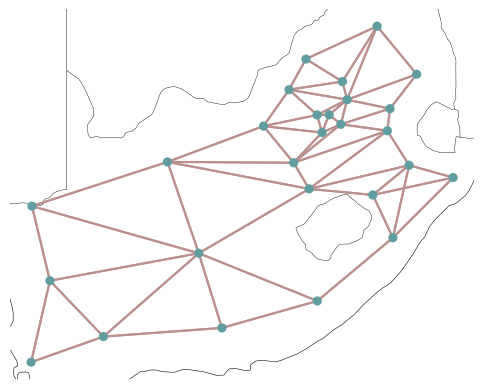

In [6]:
n.plot();

#### Components of Network

Network - Container for all Components  
Bus - Node where components attach  
Carrier - Energy carrier or technology e.g. gas, coal, oil, biomass, on-/offshore wind, solar)  
Load - Energy consumer (e.g. electricity demand)  
Generator - Generator (e.g. power plant, wind turbine, PV panel)  
Line - Power distribution and transmission lines (overhead and cables)  
Link - Links connect two buses with controllable energy flow, direction-control and losses  
StorageUnit - Storage with fixed nominal energy-to-power ratio  
GlobalConstraint - Constraints affecting many components at once, such as emission limits  
Store - Storage with separately extendable energy capacity  
LineType - Standard line types.
Transformer - 2-winding transformer.
TransformerType - Standard types of 2-winding transformer.
ShuntImpedance - Shunt.

In [129]:
for c in n96.iterate_components(list(n96.components.keys())[2:]):
    print("Component '{}' has {} entries".format(c.name,len(c.df)))

Component 'Bus' has 27 entries
Component 'Carrier' has 12 entries
Component 'GlobalConstraint' has 17 entries
Component 'Line' has 120 entries
Component 'LineType' has 34 entries
Component 'TransformerType' has 14 entries
Component 'Load' has 27 entries
Component 'Generator' has 695 entries
Component 'StorageUnit' has 328 entries


#### Temporal Resolution

In [70]:
n96.snapshots[:10]

MultiIndex([(2030, '2030-01-01 00:00:00'),
            (2030, '2030-01-01 01:00:00'),
            (2030, '2030-01-01 02:00:00'),
            (2030, '2030-01-01 03:00:00'),
            (2030, '2030-01-01 04:00:00'),
            (2030, '2030-01-01 05:00:00'),
            (2030, '2030-01-01 06:00:00'),
            (2030, '2030-01-01 07:00:00'),
            (2030, '2030-01-01 08:00:00'),
            (2030, '2030-01-01 09:00:00')],
           names=['period', 'timestep'])

In [71]:
len(n96.snapshots)

8760

# 2.1 Loads

In [130]:
n96.loads.head()

bus carrier type  p_set  q_set  sign
Load                                                           
NAMAQUALAND        NAMAQUALAND                 0.0    0.0  -1.0
WEST COAST          WEST COAST                 0.0    0.0  -1.0
PENINSULA            PENINSULA                 0.0    0.0  -1.0
SOUTHERN CAPE    SOUTHERN CAPE                 0.0    0.0  -1.0
PORT ELIZABETH  PORT ELIZABETH                 0.0    0.0  -1.0

In [131]:
n96.loads_t.p_set.head()

Load                        NAMAQUALAND  WEST COAST    PENINSULA  \
period timestep                                                    
2030   2030-01-01 00:00:00    63.881103  157.134370  2214.506333   
       2030-01-01 01:00:00    61.073279  150.227700  2117.170123   
       2030-01-01 02:00:00    59.331152  145.942427  2056.777454   
       2030-01-01 03:00:00    58.161562  143.065475  2016.232357   
       2030-01-01 04:00:00    57.770604  142.103799  2002.679383   

Load                        SOUTHERN CAPE  PORT ELIZABETH       KAROO  \
period timestep                                                         
2030   2030-01-01 00:00:00     586.739815      878.040920  226.409971   
       2030-01-01 01:00:00     560.950307      839.447590  216.458368   
       2030-01-01 02:00:00     544.949096      815.502192  210.283853   
       2030-01-01 03:00:00     534.206556      799.426260  206.138544   
       2030-01-01 04:00:00     530.615656      794.052572  204.752895   

Load                         KIMBERLEY  CARLETONVILLE      WELKOM  \
period timestep                                                     
2030   2030-01-01 00:00:00  621.470956     955.712758  427.616983   
       2030-01-01 01:00:00  594.154879     913.705447  408.821546   
       2030-01-01 02:00:00  577.206501     887.641830  397.159835   
       2030-01-01 03:00:00  565.828073     870.143815  389.330654   
       2030-01-01 04:00:00  562.024616     864.294768  386.713600   

Load                        BLOEMFONTEIN  ...    POLOKWANE     WARMBAD  \
period timestep                           ...                            
2030   2030-01-01 00:00:00    758.504087  ...  2034.063052  383.555913   
       2030-01-01 01:00:00    725.164867  ...  1944.658030  366.697131   
       2030-01-01 02:00:00    704.479406  ...  1889.186300  356.237028   
       2030-01-01 03:00:00    690.592057  ...  1851.944915  349.214554   
       2030-01-01 04:00:00    685.949945  ...  1839.496269  346.867158   

Load                           PRETORIA  JOHANNESBURG       NIGEL  \
period timestep                                                     
2030   2030-01-01 00:00:00  1404.720169   2568.560517  954.031326   
       2030-01-01 01:00:00  1342.977227   2455.662242  912.097920   
       2030-01-01 02:00:00  1304.668554   2385.614023  886.080158   
       2030-01-01 03:00:00  1278.949722   2338.586596  868.612928   
       2030-01-01 04:00:00  1270.352710   2322.866778  862.774172   

Load                        HIGHVELD SOUTH  HIGHVELD NORTH      LOWVELD  \
period timestep                                                           
2030   2030-01-01 00:00:00      348.235437      503.850250  1479.026625   
       2030-01-01 01:00:00      332.929129      481.704062  1414.017623   
       2030-01-01 02:00:00      323.432264      467.963364  1373.682509   
       2030-01-01 03:00:00      317.056468      458.738438  1346.603211   
       2030-01-01 04:00:00      314.925237      455.654830  1337.551437   

Load                         NEWCASTLE   EMPANGENI  
period timestep                                     
2030   2030-01-01 00:00:00  709.806392  979.118923  
       2030-01-01 01:00:00  678.607626  936.082819  
       2030-01-01 02:00:00  659.250218  909.380884  
       2030-01-01 03:00:00  646.254469  891.454328  
       2030-01-01 04:00:00  641.910391  885.462033  

[5 rows x 27 columns]

In [ ]:
# Load values

In [132]:
load_values = n96.loads_t.p_set
print(load_values)

Load                        NAMAQUALAND  WEST COAST    PENINSULA  \
period timestep                                                    
2030   2030-01-01 00:00:00    63.881103  157.134370  2214.506333   
       2030-01-01 01:00:00    61.073279  150.227700  2117.170123   
       2030-01-01 02:00:00    59.331152  145.942427  2056.777454   
       2030-01-01 03:00:00    58.161562  143.065475  2016.232357   
       2030-01-01 04:00:00    57.770604  142.103799  2002.679383   
...                                 ...         ...          ...   
       2030-12-31 19:00:00    70.591877  173.641494  2447.142463   
       2030-12-31 20:00:00    70.121280  172.483922  2430.828707   
       2030-12-31 21:00:00    66.381888  163.285788  2301.198728   
       2030-12-31 22:00:00    63.290164  155.680783  2194.020826   
       2030-12-31 23:00:00    60.604210  149.073888  2100.909362   

Load                        SOUTHERN CAPE  PORT ELIZABETH       KAROO  \
period timestep                           

<Axes: xlabel='period,timestep'>

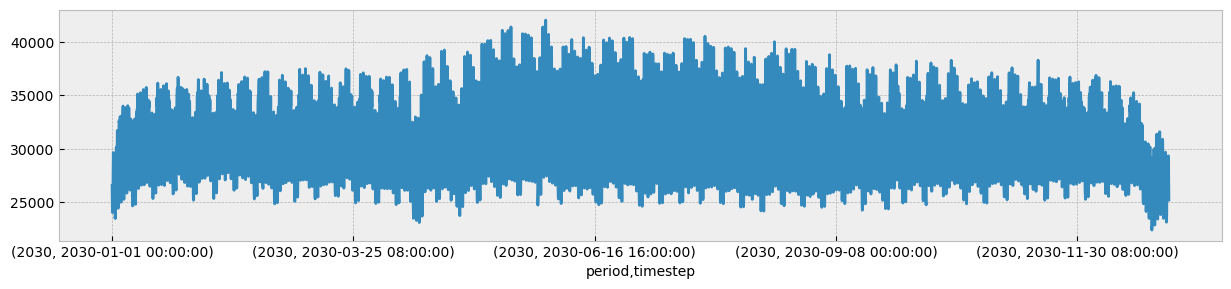

In [41]:
n96.loads_t.p_set.sum(axis=1).plot(figsize=(15,3))

In [ ]:
# Regional Distribution of loads

In [133]:
load = n96.loads_t.p_set.sum(axis=0).groupby(n96.loads.bus).sum()

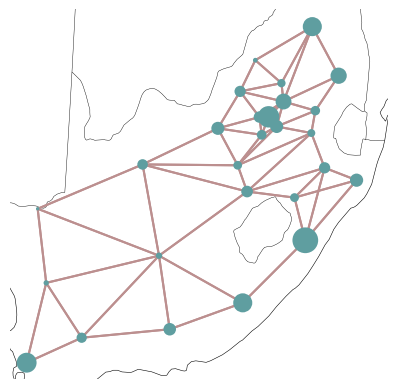

In [134]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())

n96.plot(
    ax=ax,
    bus_sizes=load/2e8,
);

# 2.2 Generators

In [135]:
n96.generators.head()

bus carrier  build_year  lifetime   p_nom  \
Generator                                                         
Arnot*     HIGHVELD NORTH    coal        2020       7.0  1116.0   
Arnot**    HIGHVELD NORTH    coal        2020      10.0  1116.0   
Camden*    HIGHVELD SOUTH    coal        2020       2.0   740.0   
Camden**   HIGHVELD SOUTH    coal        2020       4.0   370.0   
Duvha*     HIGHVELD NORTH    coal        2020      12.0  1725.0   

           p_nom_extendable  efficiency  ramp_limit_up  ramp_limit_down  \
Generator                                                                 
Arnot*                False    0.282486       0.112903         0.112903   
Arnot**               False    0.282486       0.112903         0.112903   
Camden*               False    0.265018       0.089189         0.089189   
Camden**              False    0.252101       0.178378         0.178378   
Duvha*                False    0.298359       0.114783         0.114783   

           marginal_cost  ...  sign committable start_up_cost  shut_down_cost  \
Generator                 ...                                                   
Arnot*        428.079844  ...   1.0       False           0.0             0.0   
Arnot**       428.079344  ...   1.0       False           0.0             0.0   
Camden*       536.773038  ...   1.0       False           0.0             0.0   
Camden**      559.254446  ...   1.0       False           0.0             0.0   
Duvha*        315.198286  ...   1.0       False           0.0             0.0   

          min_up_time  min_down_time  up_time_before  down_time_before  \
Generator                                                                
Arnot*              0              0               1                 0   
Arnot**             0              0               1                 0   
Camden*             0              0               1                 0   
Camden**            0              0               1                 0   
Duvha*              0              0               1                 0   

           ramp_limit_start_up  ramp_limit_shut_down  
Generator                                             
Arnot*                     1.0                   1.0  
Arnot**                    1.0                   1.0  
Camden*                    1.0                   1.0  
Camden**                   1.0                   1.0  
Duvha*                     1.0                   1.0  

[5 rows x 31 columns]

In [ ]:
# Generator outputs

In [136]:
generator_outputs = n96.generators_t.p
print(generator_outputs)

Generator                   Acacia  Ankerlig  Arnot*  Arnot**  Avon  \
period timestep                                                       
2030   2030-01-01 00:00:00     0.0       0.0     0.0      0.0   0.0   
       2030-01-01 01:00:00     0.0       0.0     0.0      0.0   0.0   
       2030-01-01 02:00:00     0.0       0.0     0.0      0.0   0.0   
       2030-01-01 03:00:00     0.0       0.0     0.0      0.0   0.0   
       2030-01-01 04:00:00     0.0       0.0     0.0      0.0   0.0   
...                            ...       ...     ...      ...   ...   
       2030-12-31 19:00:00     0.0       0.0     0.0      0.0   0.0   
       2030-12-31 20:00:00     0.0       0.0     0.0      0.0   0.0   
       2030-12-31 21:00:00     0.0       0.0     0.0      0.0   0.0   
       2030-12-31 22:00:00     0.0       0.0     0.0      0.0   0.0   
       2030-12-31 23:00:00     0.0       0.0     0.0      0.0   0.0   

Generator                   BLOEMFONTEIN REIPPPP_BW1_solar  \
period timeste

In [137]:
n96.generators_t.p_max_pu #.head()

Generator                   BLOEMFONTEIN REIPPPP_BW1_solar  \
period timestep                                              
2030   2030-01-01 00:00:00                             0.0   
       2030-01-01 01:00:00                             0.0   
       2030-01-01 02:00:00                             0.0   
       2030-01-01 03:00:00                             0.0   
       2030-01-01 04:00:00                             0.0   
...                                                    ...   
       2030-12-31 19:00:00                             0.0   
       2030-12-31 20:00:00                             0.0   
       2030-12-31 21:00:00                             0.0   
       2030-12-31 22:00:00                             0.0   
       2030-12-31 23:00:00                             0.0   

Generator                   BLOEMFONTEIN REIPPPP_BW5_solar  \
period timestep                                              
2030   2030-01-01 00:00:00                             0.0   
       2030-01-01 01:00:00                             0.0   
       2030-01-01 02:00:00                             0.0   
       2030-01-01 03:00:00                             0.0   
       2030-01-01 04:00:00                             0.0   
...                                                    ...   
       2030-12-31 19:00:00                             0.0   
       2030-12-31 20:00:00                             0.0   
       2030-12-31 21:00:00                             0.0   
       2030-12-31 22:00:00                             0.0   
       2030-12-31 23:00:00                             0.0   

Generator                   BLOEMFONTEIN REIPPPP_BW6_solar  \
period timestep                                              
2030   2030-01-01 00:00:00                             0.0   
       2030-01-01 01:00:00                             0.0   
       2030-01-01 02:00:00                             0.0   
       2030-01-01 03:00:00                             0.0   
       2030-01-01 04:00:00                             0.0   
...                                                    ...   
       2030-12-31 19:00:00                             0.0   
       2030-12-31 20:00:00                             0.0   
       2030-12-31 21:00:00                             0.0   
       2030-12-31 22:00:00                             0.0   
       2030-12-31 23:00:00                             0.0   

Generator                   BLOEMFONTEIN onwind_2020  \
period timestep                                        
2030   2030-01-01 00:00:00                   0.15450   
       2030-01-01 01:00:00                   0.15975   
       2030-01-01 02:00:00                   0.68325   
       2030-01-01 03:00:00                   0.69075   
       2030-01-01 04:00:00                   0.66550   
...                                              ...   
       2030-12-31 19:00:00                   0.46625   
       2030-12-31 20:00:00                   0.48325   
       2030-12-31 21:00:00                   0.60275   
       2030-12-31 22:00:00                   0.64650   
       2030-12-31 23:00:00                   0.67575   

Generator                   BLOEMFONTEIN onwind_2022  \
period timestep                                        
2030   2030-01-01 00:00:00                   0.15450   
       2030-01-01 01:00:00                   0.15975   
       2030-01-01 02:00:00                   0.68325   
       2030-01-01 03:00:00                   0.69075   
       2030-01-01 04:00:00                   0.66550   
...                                              ...   
       2030-12-31 19:00:00                   0.46625   
       2030-12-31 20:00:00                   0.48325   
       2030-12-31 21:00:00                   0.60275   
       2030-12-31 22:00:00                   0.64650   
       2030-12-31 23:00:00                   0.67575   

Generator                   BLOEMFONTEIN onwind_2024  \
period timestep                                        
2030   20

<Axes: xlabel='period,timestep'>

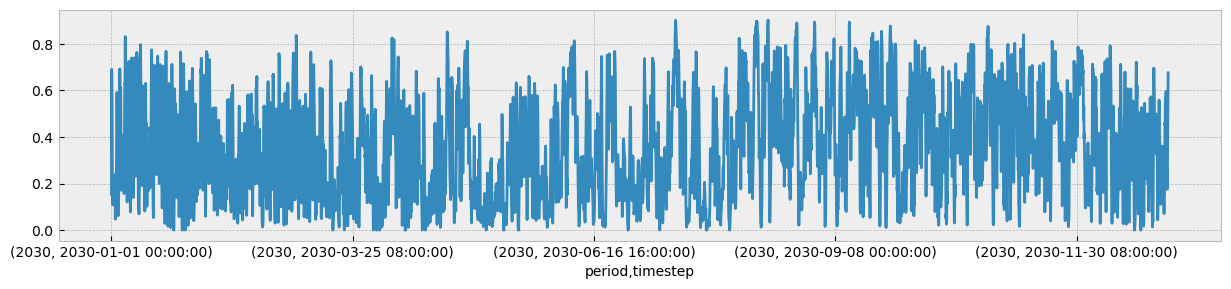

In [138]:
n96.generators_t.p_max_pu.loc["2020":"2030", "BLOEMFONTEIN onwind_2020"].plot(figsize=(15,3))

<Axes: xlabel='period,timestep'>

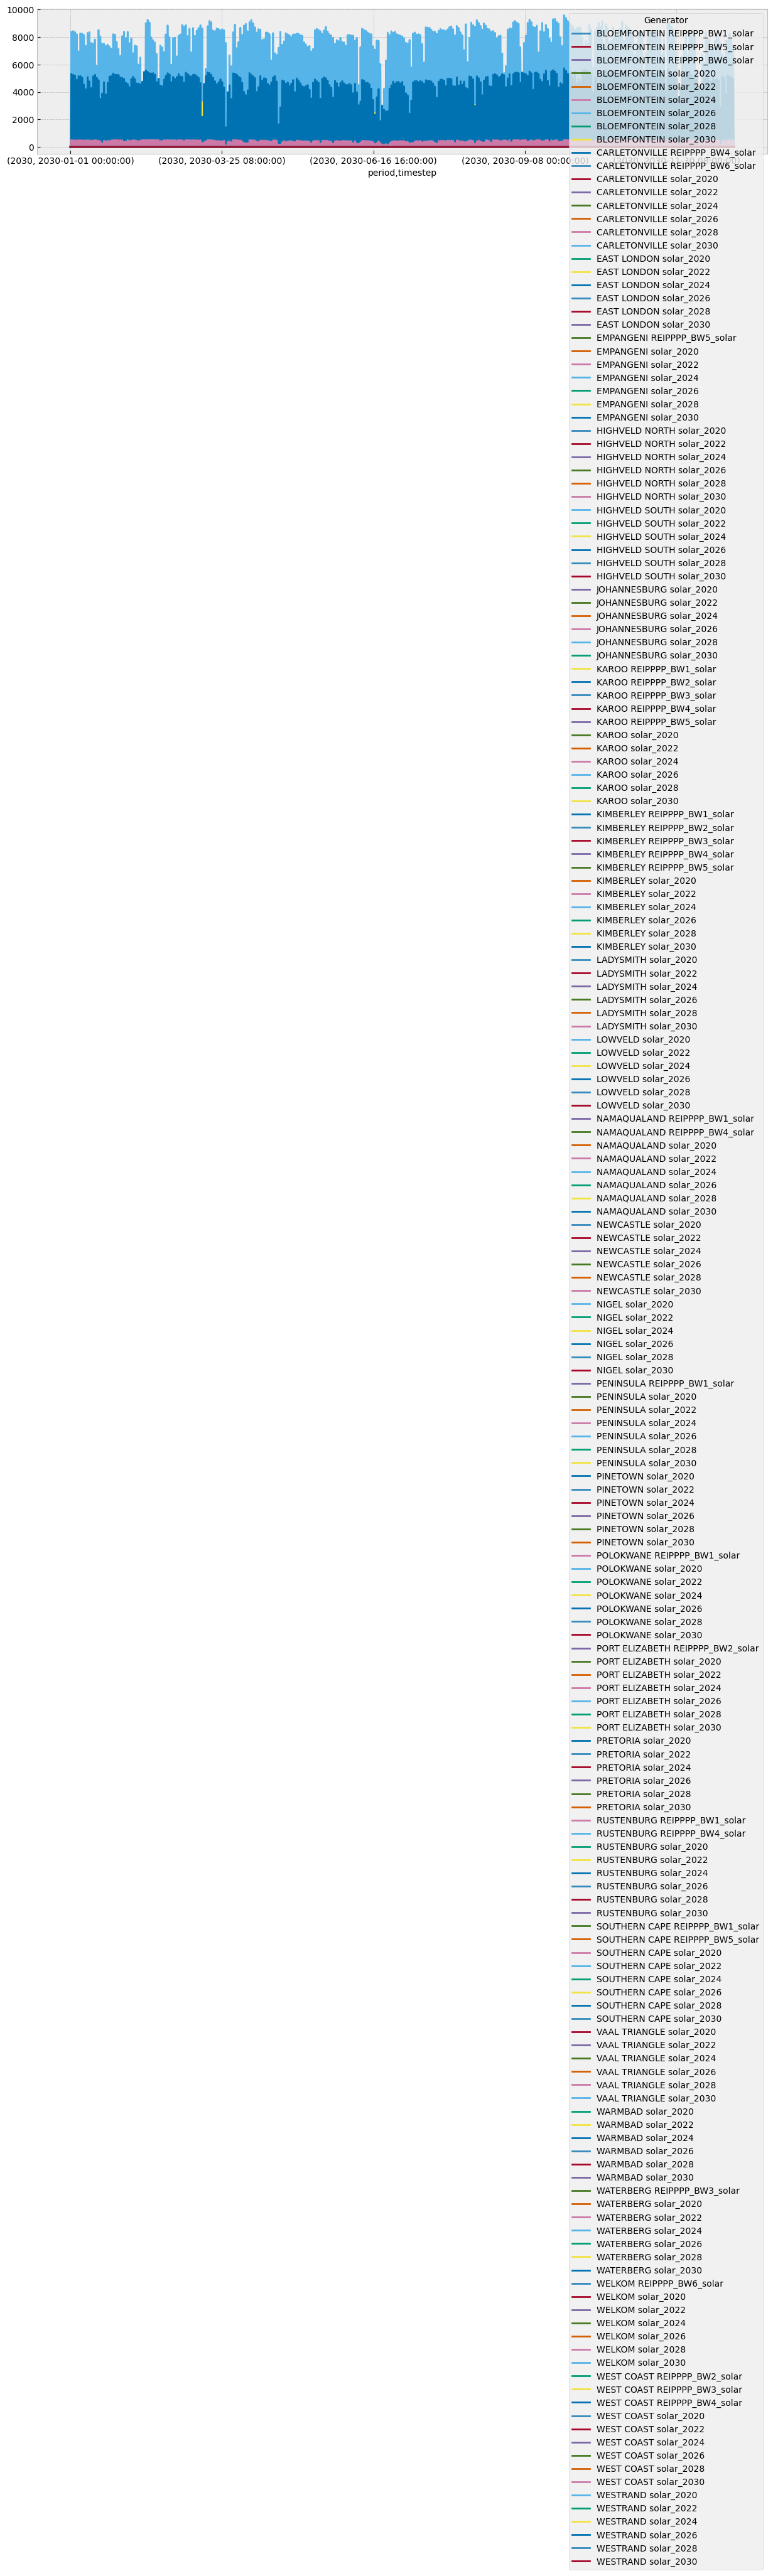

In [139]:
solar_gen = n96.generators_t.p.filter(like='solar').loc["2020":"2030"]
solar_gen.plot(figsize=(15, 3))

<Axes: xlabel='period,timestep'>

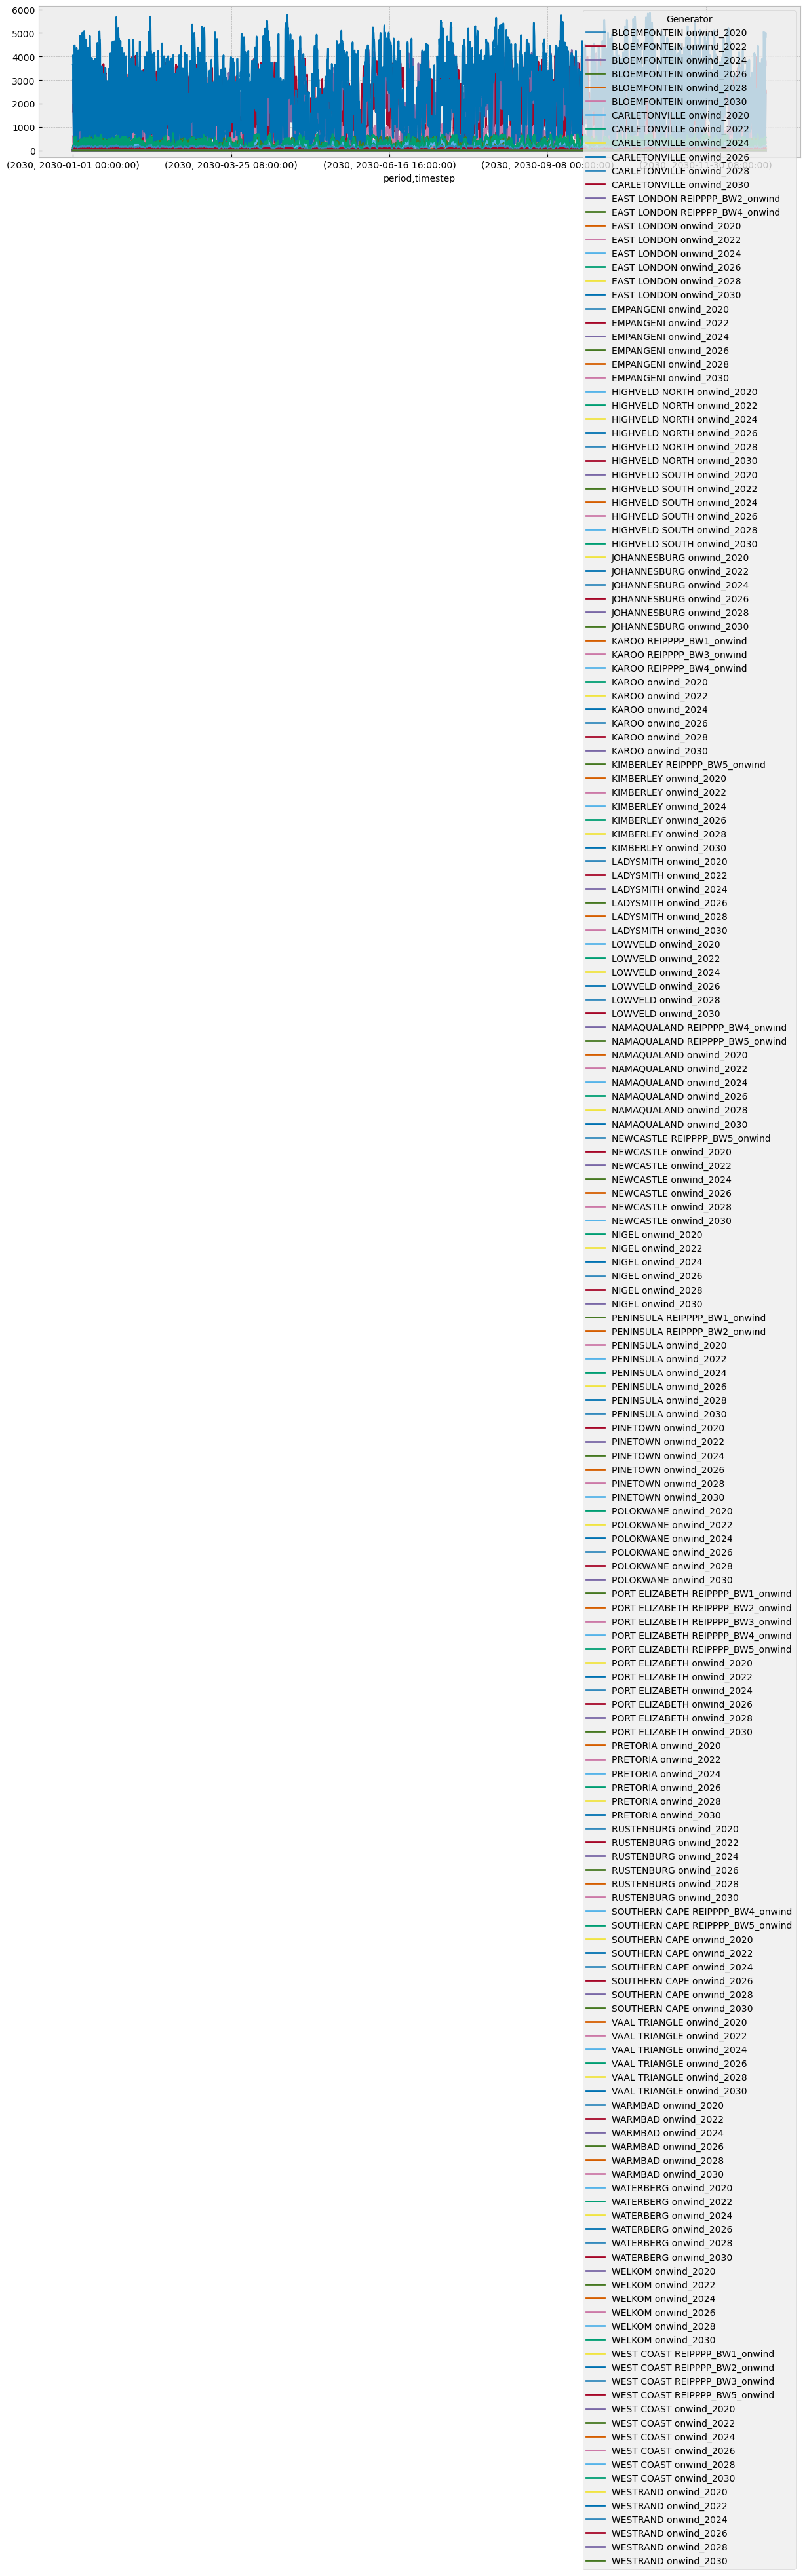

In [141]:
onwind_gen = n96.generators_t.p.filter(like='onwind').loc["2020":"2030"]
onwind_gen.plot(figsize=(15, 3))

In [144]:
solar_gen = n96.generators_t.p.filter(like='solar')
print(solar_gen)

Generator                   BLOEMFONTEIN REIPPPP_BW1_solar  \
period timestep                                              
2030   2030-01-01 00:00:00                             0.0   
       2030-01-01 01:00:00                             0.0   
       2030-01-01 02:00:00                             0.0   
       2030-01-01 03:00:00                             0.0   
       2030-01-01 04:00:00                             0.0   
...                                                    ...   
       2030-12-31 19:00:00                             0.0   
       2030-12-31 20:00:00                             0.0   
       2030-12-31 21:00:00                             0.0   
       2030-12-31 22:00:00                             0.0   
       2030-12-31 23:00:00                             0.0   

Generator                   BLOEMFONTEIN REIPPPP_BW5_solar  \
period timestep                                              
2030   2030-01-01 00:00:00                             0.0   
       

<Axes: xlabel='period,timestep'>

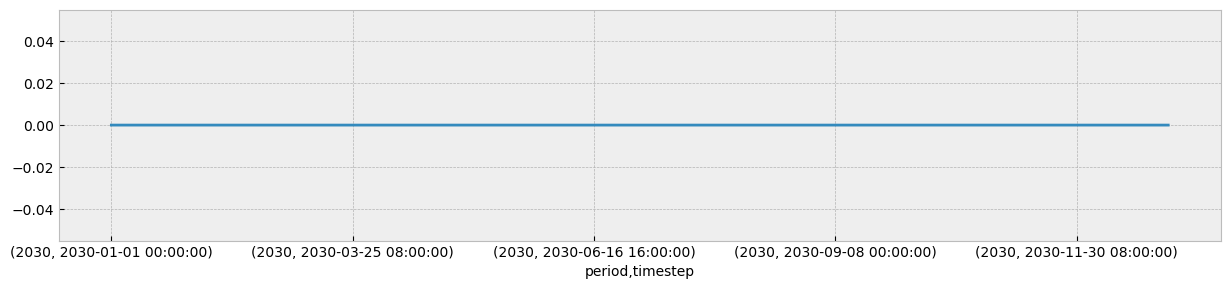

In [143]:
n96.generators_t.p.loc["2020":"2030", "BLOEMFONTEIN solar_2030"].plot(figsize=(15,3))

In [ ]:
### Demand

In [145]:
n96.loads_t.p_set.sum()

Load
NAMAQUALAND       6.668650e+05
WEST COAST        1.640351e+06
PENINSULA         2.311758e+07
SOUTHERN CAPE     6.125070e+06
PORT ELIZABETH    9.166009e+06
KAROO             2.363530e+06
KIMBERLEY         6.487634e+06
CARLETONVILLE     9.976837e+06
WELKOM            4.463962e+06
BLOEMFONTEIN      7.918145e+06
EAST LONDON       2.121032e+07
PINETOWN          3.867737e+07
LADYSMITH         4.582695e+06
VAAL TRIANGLE     5.555741e+06
WESTRAND          7.695201e+06
RUSTENBURG        7.370832e+06
WATERBERG         1.301627e+06
POLOKWANE         2.123391e+07
WARMBAD           4.004001e+06
PRETORIA          1.466410e+07
JOHANNESBURG      2.681361e+07
NIGEL             9.959285e+06
HIGHVELD SOUTH    3.635285e+06
HIGHVELD NORTH    5.259773e+06
LOWVELD           1.543979e+07
NEWCASTLE         7.409782e+06
EMPANGENI         1.022118e+07
dtype: float64

In [ ]:
### Capacity Factor

In [74]:
n96.generators_t.p.mean() / n96.generators.p_nom

Generator
Acacia                 0.000000
Ankerlig               0.000000
Arnot*                 0.129974
Arnot**                0.133754
Avon                   0.000000
                         ...   
WESTRAND solar_2022         NaN
WESTRAND solar_2024         NaN
WESTRAND solar_2026         NaN
WESTRAND solar_2028         NaN
WESTRAND solar_2030         NaN
Length: 695, dtype: float64

In [ ]:
### Optimal Generator capacities

In [55]:
n96.generators.groupby("carrier").p_nom_opt.sum() / 1e3 #GW

carrier
CCGT                 0.000000
CSP                  0.600000
OCGT                10.933654
biomass              0.193060
coal                40.284000
gas                  3.844000
hydro                0.683020
hydro-import         1.764000
load_shedding    27000.000000
nuclear              1.854000
onwind              28.494386
solar               25.823256
Name: p_nom_opt, dtype: float64

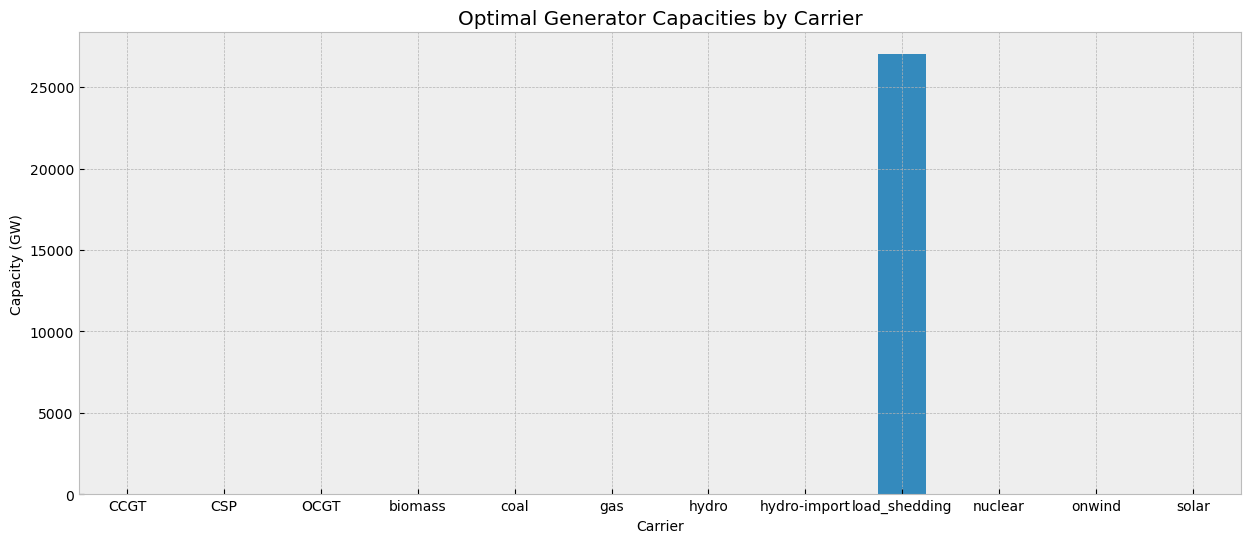

In [32]:
capacities = n.generators.groupby("carrier").p_nom_opt.sum() / 1e3 #GW

ax = capacities.plot.bar(figsize=(15,6), rot=0)
ax.set_xlabel("Carrier")
ax.set_ylabel("Capacity (GW)")
ax.set_title("Optimal Generator Capacities by Carrier")
plt.show()

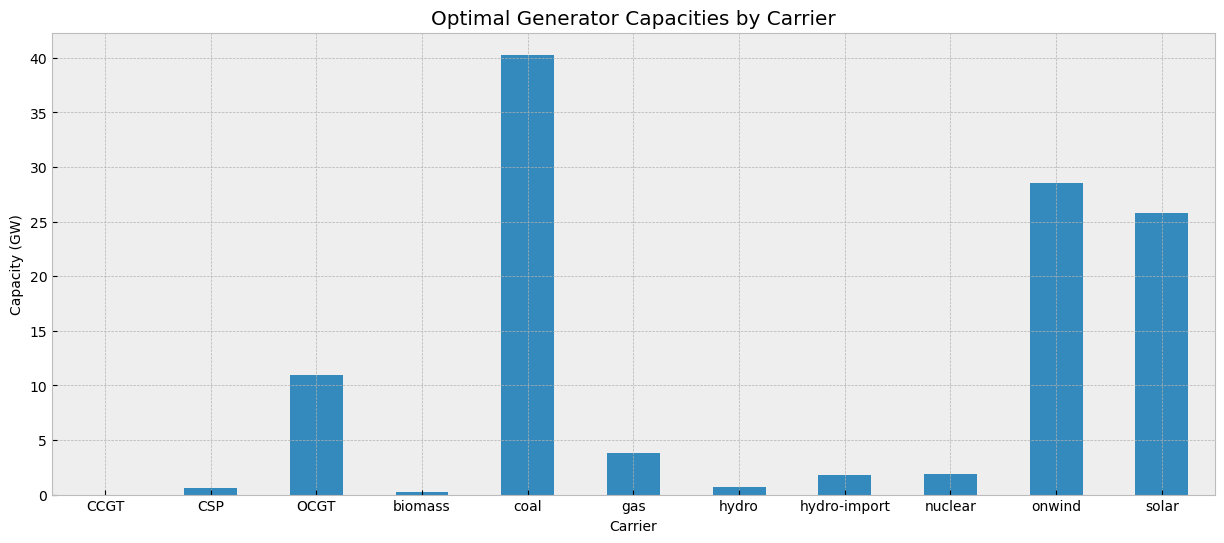

In [89]:
capacities = n96.generators.groupby("carrier").p_nom_opt.sum() / 1e3 #GW
capacities = capacities.drop("load_shedding")

ax = capacities.plot.bar(figsize=(15,6), rot=0)
ax.set_xlabel("Carrier")
ax.set_ylabel("Capacity (GW)")
ax.set_title("Optimal Generator Capacities by Carrier")
plt.show()

In [ ]:
#### Renewable / Fossil

In [58]:
capacities = n96.generators.groupby("carrier").p_nom_opt.sum() / 1e3 #GW
capacities = capacities.drop("load_shedding")

renewables = capacities.loc[["CSP", "biomass", "hydro", "hydro-import", "onwind", "solar"]].sum()
nuclear = capacities.loc[["nuclear"]].sum()
fossil_fuels = capacities.sum() - renewables - nuclear

print("Renewable capacities (GW):", renewables)
print("Fossil fuel capacities (GW):", fossil_fuels)
print("Nuclear fuel capacities (GW):", nuclear)

Renewable capacities (GW): 57.55772175541881
Fossil fuel capacities (GW): 55.06165423264399
Nuclear fuel capacities (GW): 1.854


In [ ]:
# Generation mix

In [115]:
n96.generators = n96.generators[n96.generators.carrier != 'load_shedding']

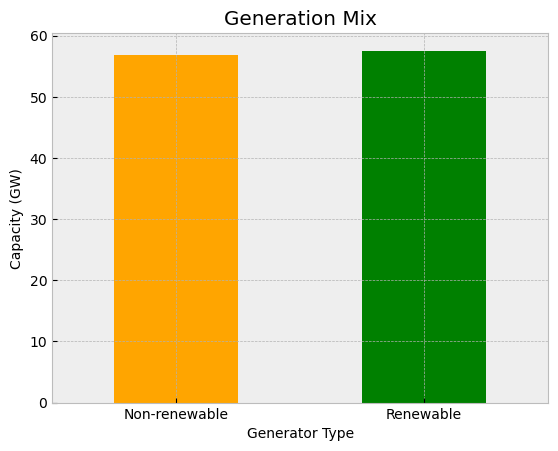

In [117]:
gen_type = {'Renewable': ['solar', 'onwind', 'hydro', 'hydro-import', 'CSP', 'biomass'], 
            'Non-renewable': ['coal', 'gas', 'CCGT', 'OCGT', 'nuclear']}
gen_mix = n96.generators.groupby(n96.generators.carrier.apply(lambda x: 'Renewable' if x in gen_type['Renewable'] else 'Non-renewable'))\
            .p_nom_opt.sum() / 1e3 # convert to GW


gen_mix.plot(kind='bar', stacked=True, rot=0, color=['orange', 'green'])
plt.xlabel('Generator Type')
plt.ylabel('Capacity (GW)')
plt.title('Generation Mix')
plt.show()



IndexError: index 0 is out of bounds for axis 0 with size 0

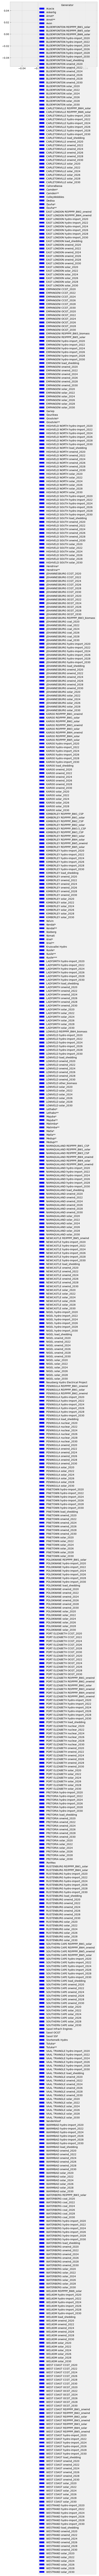

In [118]:
# Calculate the actual generation for each generator
actual_generation = n96.generators_t.p.multiply(n96.generators_t.status).groupby(n96.generators.carrier).sum() / 1e3 # Convert to GW

# Categorize the generators into renewable and non-renewable
actual_gen_mix = actual_generation.groupby(actual_generation.index.map(lambda x: 'Renewable' if x in gen_type['Renewable'] else 'Non-renewable'))\
                                .sum()

# Plot the actual generation mix
actual_gen_mix.plot(kind='bar', stacked=True, rot=0, color=['orange', 'green'])
plt.xlabel('Generator Type')
plt.ylabel('Generation (MWh)')
plt.title('Actual Generation Mix')
plt.show()

In [148]:
n96.generators_t.p_max_pu

Generator                   BLOEMFONTEIN REIPPPP_BW1_solar  \
period timestep                                              
2030   2030-01-01 00:00:00                             0.0   
       2030-01-01 01:00:00                             0.0   
       2030-01-01 02:00:00                             0.0   
       2030-01-01 03:00:00                             0.0   
       2030-01-01 04:00:00                             0.0   
...                                                    ...   
       2030-12-31 19:00:00                             0.0   
       2030-12-31 20:00:00                             0.0   
       2030-12-31 21:00:00                             0.0   
       2030-12-31 22:00:00                             0.0   
       2030-12-31 23:00:00                             0.0   

Generator                   BLOEMFONTEIN REIPPPP_BW5_solar  \
period timestep                                              
2030   2030-01-01 00:00:00                             0.0   
       2030-01-01 01:00:00                             0.0   
       2030-01-01 02:00:00                             0.0   
       2030-01-01 03:00:00                             0.0   
       2030-01-01 04:00:00                             0.0   
...                                                    ...   
       2030-12-31 19:00:00                             0.0   
       2030-12-31 20:00:00                             0.0   
       2030-12-31 21:00:00                             0.0   
       2030-12-31 22:00:00                             0.0   
       2030-12-31 23:00:00                             0.0   

Generator                   BLOEMFONTEIN REIPPPP_BW6_solar  \
period timestep                                              
2030   2030-01-01 00:00:00                             0.0   
       2030-01-01 01:00:00                             0.0   
       2030-01-01 02:00:00                             0.0   
       2030-01-01 03:00:00                             0.0   
       2030-01-01 04:00:00                             0.0   
...                                                    ...   
       2030-12-31 19:00:00                             0.0   
       2030-12-31 20:00:00                             0.0   
       2030-12-31 21:00:00                             0.0   
       2030-12-31 22:00:00                             0.0   
       2030-12-31 23:00:00                             0.0   

Generator                   BLOEMFONTEIN onwind_2020  \
period timestep                                        
2030   2030-01-01 00:00:00                   0.15450   
       2030-01-01 01:00:00                   0.15975   
       2030-01-01 02:00:00                   0.68325   
       2030-01-01 03:00:00                   0.69075   
       2030-01-01 04:00:00                   0.66550   
...                                              ...   
       2030-12-31 19:00:00                   0.46625   
       2030-12-31 20:00:00                   0.48325   
       2030-12-31 21:00:00                   0.60275   
       2030-12-31 22:00:00                   0.64650   
       2030-12-31 23:00:00                   0.67575   

Generator                   BLOEMFONTEIN onwind_2022  \
period timestep                                        
2030   2030-01-01 00:00:00                   0.15450   
       2030-01-01 01:00:00                   0.15975   
       2030-01-01 02:00:00                   0.68325   
       2030-01-01 03:00:00                   0.69075   
       2030-01-01 04:00:00                   0.66550   
...                                              ...   
       2030-12-31 19:00:00                   0.46625   
       2030-12-31 20:00:00                   0.48325   
       2030-12-31 21:00:00                   0.60275   
       2030-12-31 22:00:00                   0.64650   
       2030-12-31 23:00:00                   0.67575   

Generator                   BLOEMFONTEIN onwind_2024  \
period timestep                                        
2030   20

In [ ]:
### Storage units

In [147]:
# power flow of storage units in MW
n96.storage_units_t.p

StorageUnit                 BLOEMFONTEIN PHS_2020  BLOEMFONTEIN PHS_2022  \
period timestep                                                            
2030   2030-01-01 00:00:00                    0.0                    0.0   
       2030-01-01 01:00:00                    0.0                    0.0   
       2030-01-01 02:00:00                    0.0                    0.0   
       2030-01-01 03:00:00                    0.0                    0.0   
       2030-01-01 04:00:00                    0.0                    0.0   
...                                           ...                    ...   
       2030-12-31 19:00:00                    0.0                    0.0   
       2030-12-31 20:00:00                    0.0                    0.0   
       2030-12-31 21:00:00                    0.0                    0.0   
       2030-12-31 22:00:00                    0.0                    0.0   
       2030-12-31 23:00:00                    0.0                    0.0   

StorageUnit                 BLOEMFONTEIN PHS_2024  BLOEMFONTEIN PHS_2026  \
period timestep                                                            
2030   2030-01-01 00:00:00                    0.0                    0.0   
       2030-01-01 01:00:00                    0.0                    0.0   
       2030-01-01 02:00:00                    0.0                    0.0   
       2030-01-01 03:00:00                    0.0                    0.0   
       2030-01-01 04:00:00                    0.0                    0.0   
...                                           ...                    ...   
       2030-12-31 19:00:00                    0.0                    0.0   
       2030-12-31 20:00:00                    0.0                    0.0   
       2030-12-31 21:00:00                    0.0                    0.0   
       2030-12-31 22:00:00                    0.0                    0.0   
       2030-12-31 23:00:00                    0.0                    0.0   

StorageUnit                 BLOEMFONTEIN PHS_2028  BLOEMFONTEIN PHS_2030  \
period timestep                                                            
2030   2030-01-01 00:00:00                    0.0                    0.0   
       2030-01-01 01:00:00                    0.0                    0.0   
       2030-01-01 02:00:00                    0.0                    0.0   
       2030-01-01 03:00:00                    0.0                    0.0   
       2030-01-01 04:00:00                    0.0                    0.0   
...                                           ...                    ...   
       2030-12-31 19:00:00                    0.0                    0.0   
       2030-12-31 20:00:00                    0.0                    0.0   
       2030-12-31 21:00:00                    0.0                    0.0   
       2030-12-31 22:00:00                    0.0                    0.0   
       2030-12-31 23:00:00                    0.0                    0.0   

StorageUnit                 BLOEMFONTEIN battery_2020  \
period timestep                                         
2030   2030-01-01 00:00:00                        0.0   
       2030-01-01 01:00:00                        0.0   
       2030-01-01 02:00:00                        0.0   
       2030-01-01 03:00:00                        0.0   
       2030-01-01 04:00:00                        0.0   
...                                               ...   
       2030-12-31 19:00:00                        0.0   
       2030-12-31 20:00:00                        0.0   
       2030-12-31 21:00:00                        0.0   
       2030-12-31 22:00:00                        0.0   
       2030-12-31 23:00:00                        0.0   

StorageUnit                 BLOEMFONTEIN battery_2022  \
period timestep                                         
2030   2030-01-01 00:00:00                        0.0   
       2030-01-01 01:00:00                        0.0   
       2030-01-01 02:00:00                        0.0   
      

<Axes: xlabel='period,timestep'>

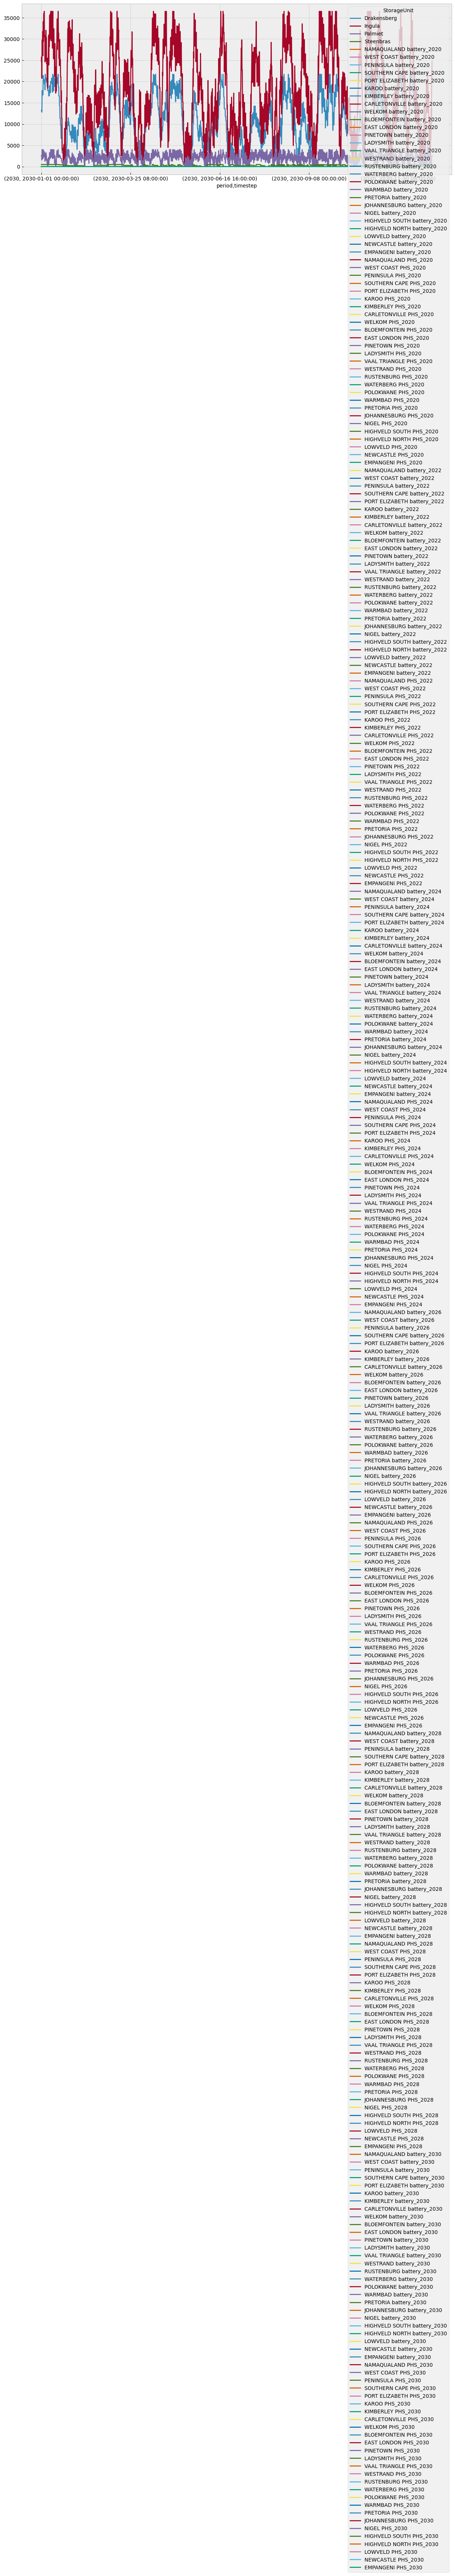

In [98]:
# State of charge in MWh
fig, ax = plt.subplots(figsize=(15,6))
n96.storage_units_t.state_of_charge.plot(ax=ax)

In [103]:
# Get the time series of SOC for all the storage units in the network
n96.storage_units.groupby("carrier")



In [108]:
n96.storage_units.head()

carrier          bus   p_nom  max_hours  \
StorageUnit                                                         
Drakensberg                   PHS    LADYSMITH  1000.0       21.7   
Ingula                        PHS    NEWCASTLE  1332.0       27.4   
Palmiet                       PHS    PENINSULA   400.0       10.0   
Steenbras                     PHS    PENINSULA   180.0        2.7   
NAMAQUALAND battery_2020  battery  NAMAQUALAND     0.0        3.0   

                          capital_cost  marginal_cost  efficiency_dispatch  \
StorageUnit                                                                  
Drakensberg               2.220000e+05       0.010108             0.858487   
Ingula                    2.796000e+06       0.009482             0.883176   
Palmiet                   2.220000e+05       0.009435             0.882610   
Steenbras                 2.220000e+05     300.009822             0.848528   
NAMAQUALAND battery_2020  1.875148e+06       0.009184             0.943398   

                          efficiency_store  cyclic_state_of_charge  \
StorageUnit                                                          
Drakensberg                       0.858487                    True   
Ingula                            0.883176                    True   
Palmiet                           0.882610                    True   
Steenbras                         0.848528                    True   
NAMAQUALAND battery_2020          0.943398                    True   

                          p_nom_extendable  ...  p_set  q_set sign lifetime  \
StorageUnit                                 ...                               
Drakensberg                          False  ...    0.0    0.0  1.0      inf   
Ingula                               False  ...    0.0    0.0  1.0      inf   
Palmiet                              False  ...    0.0    0.0  1.0      inf   
Steenbras                            False  ...    0.0    0.0  1.0      inf   
NAMAQUALAND battery_2020              True  ...    0.0    0.0  1.0      inf   

                          state_of_charge_initial  \
StorageUnit                                         
Drakensberg                                   0.0   
Ingula                                        0.0   
Palmiet                                       0.0   
Steenbras                                     0.0   
NAMAQUALAND battery_2020                      0.0   

                          state_of_charge_initial_per_period  \
StorageUnit                                                    
Drakensberg                                            False   
Ingula                                                 False   
Palmiet                                                False   
Steenbras                                              False   
NAMAQUALAND battery_2020                               False   

                          state_of_charge_set  \
StorageUnit                                     
Drakensberg                               NaN   
Ingula                                    NaN   
Palmiet                                   NaN   
Steenbras                                 NaN   
NAMAQUALAND battery_2020                  NaN   

                          cyclic_state_of_charge_per_period  standing_loss  \
StorageUnit                                                                  
Drakensberg                                            True            0.0   
Ingula                                                 True            0.0   
Palmiet                                                True            0.0   
Steenbras                                              True            0.0   
NAMAQUALAND battery_2020                               True            0.0   

                          inflow  
StorageUnit                       
Drakensberg                  0.0  
Ingula                       0.0  
Palmiet                      0.0  
Steenbras                    0.0  
NAMAQUALAND battery_2020    

In [121]:
n96.generators_t.p

Generator                   Acacia  Ankerlig  Arnot*  Arnot**  Avon  \
period timestep                                                       
2030   2030-01-01 00:00:00     0.0       0.0     0.0      0.0   0.0   
       2030-01-01 01:00:00     0.0       0.0     0.0      0.0   0.0   
       2030-01-01 02:00:00     0.0       0.0     0.0      0.0   0.0   
       2030-01-01 03:00:00     0.0       0.0     0.0      0.0   0.0   
       2030-01-01 04:00:00     0.0       0.0     0.0      0.0   0.0   
...                            ...       ...     ...      ...   ...   
       2030-12-31 19:00:00     0.0       0.0     0.0      0.0   0.0   
       2030-12-31 20:00:00     0.0       0.0     0.0      0.0   0.0   
       2030-12-31 21:00:00     0.0       0.0     0.0      0.0   0.0   
       2030-12-31 22:00:00     0.0       0.0     0.0      0.0   0.0   
       2030-12-31 23:00:00     0.0       0.0     0.0      0.0   0.0   

Generator                   BLOEMFONTEIN REIPPPP_BW1_solar  \
period timestep                                              
2030   2030-01-01 00:00:00                             0.0   
       2030-01-01 01:00:00                             0.0   
       2030-01-01 02:00:00                             0.0   
       2030-01-01 03:00:00                             0.0   
       2030-01-01 04:00:00                             0.0   
...                                                    ...   
       2030-12-31 19:00:00                             0.0   
       2030-12-31 20:00:00                             0.0   
       2030-12-31 21:00:00                             0.0   
       2030-12-31 22:00:00                             0.0   
       2030-12-31 23:00:00                             0.0   

Generator                   BLOEMFONTEIN REIPPPP_BW5_solar  \
period timestep                                              
2030   2030-01-01 00:00:00                             0.0   
       2030-01-01 01:00:00                             0.0   
       2030-01-01 02:00:00                             0.0   
       2030-01-01 03:00:00                             0.0   
       2030-01-01 04:00:00                             0.0   
...                                                    ...   
       2030-12-31 19:00:00                             0.0   
       2030-12-31 20:00:00                             0.0   
       2030-12-31 21:00:00                             0.0   
       2030-12-31 22:00:00                             0.0   
       2030-12-31 23:00:00                             0.0   

Generator                   BLOEMFONTEIN REIPPPP_BW6_solar  \
period timestep                                              
2030   2030-01-01 00:00:00                             0.0   
       2030-01-01 01:00:00                             0.0   
       2030-01-01 02:00:00                             0.0   
       2030-01-01 03:00:00                             0.0   
       2030-01-01 04:00:00                             0.0   
...                                                    ...   
       2030-12-31 19:00:00                             0.0   
       2030-12-31 20:00:00                             0.0   
       2030-12-31 21:00:00                             0.0   
       2030-12-31 22:00:00                             0.0   
       2030-12-31 23:00:00                             0.0   

Generator                   BLOEMFONTEIN hydro-import_2020  \
period timestep                                              
2030   2030-01-01 00:00:00                             0.0   
       2030-01-01 01:00:00                             0.0   
       2030-01-01 02:00:00                             0.0   
       2030-01-01 03:00:00                             0.0   
       2030-01-01 04:00:00                             0.0   
...                                                    ...   
       2030-12-31 19:00:00                             0.0   
       2030-12-31 20:00:00                             0.0   
       2030-12-31 21:00:00         

In [123]:
n96.generators_t.p/n96.generators.p_nom

Generator                   Acacia  Ankerlig  Arnot*  Arnot**  Avon  \
period timestep                                                       
2030   2030-01-01 00:00:00     0.0       0.0     0.0      0.0   0.0   
       2030-01-01 01:00:00     0.0       0.0     0.0      0.0   0.0   
       2030-01-01 02:00:00     0.0       0.0     0.0      0.0   0.0   
       2030-01-01 03:00:00     0.0       0.0     0.0      0.0   0.0   
       2030-01-01 04:00:00     0.0       0.0     0.0      0.0   0.0   
...                            ...       ...     ...      ...   ...   
       2030-12-31 19:00:00     0.0       0.0     0.0      0.0   0.0   
       2030-12-31 20:00:00     0.0       0.0     0.0      0.0   0.0   
       2030-12-31 21:00:00     0.0       0.0     0.0      0.0   0.0   
       2030-12-31 22:00:00     0.0       0.0     0.0      0.0   0.0   
       2030-12-31 23:00:00     0.0       0.0     0.0      0.0   0.0   

Generator                   BLOEMFONTEIN REIPPPP_BW1_solar  \
period timestep                                              
2030   2030-01-01 00:00:00                             0.0   
       2030-01-01 01:00:00                             0.0   
       2030-01-01 02:00:00                             0.0   
       2030-01-01 03:00:00                             0.0   
       2030-01-01 04:00:00                             0.0   
...                                                    ...   
       2030-12-31 19:00:00                             0.0   
       2030-12-31 20:00:00                             0.0   
       2030-12-31 21:00:00                             0.0   
       2030-12-31 22:00:00                             0.0   
       2030-12-31 23:00:00                             0.0   

Generator                   BLOEMFONTEIN REIPPPP_BW5_solar  \
period timestep                                              
2030   2030-01-01 00:00:00                             0.0   
       2030-01-01 01:00:00                             0.0   
       2030-01-01 02:00:00                             0.0   
       2030-01-01 03:00:00                             0.0   
       2030-01-01 04:00:00                             0.0   
...                                                    ...   
       2030-12-31 19:00:00                             0.0   
       2030-12-31 20:00:00                             0.0   
       2030-12-31 21:00:00                             0.0   
       2030-12-31 22:00:00                             0.0   
       2030-12-31 23:00:00                             0.0   

Generator                   BLOEMFONTEIN REIPPPP_BW6_solar  \
period timestep                                              
2030   2030-01-01 00:00:00                             0.0   
       2030-01-01 01:00:00                             0.0   
       2030-01-01 02:00:00                             0.0   
       2030-01-01 03:00:00                             0.0   
       2030-01-01 04:00:00                             0.0   
...                                                    ...   
       2030-12-31 19:00:00                             0.0   
       2030-12-31 20:00:00                             0.0   
       2030-12-31 21:00:00                             0.0   
       2030-12-31 22:00:00                             0.0   
       2030-12-31 23:00:00                             0.0   

Generator                   BLOEMFONTEIN hydro-import_2020  \
period timestep                                              
2030   2030-01-01 00:00:00                             NaN   
       2030-01-01 01:00:00                             NaN   
       2030-01-01 02:00:00                             NaN   
       2030-01-01 03:00:00                             NaN   
       2030-01-01 04:00:00                             NaN   
...                                                    ...   
       2030-12-31 19:00:00                             NaN   
       2030-12-31 20:00:00                             NaN   
       2030-12-31 21:00:00         

# 2.3 Carriers

In [60]:
n96.carriers

co2_emissions    color             nice_name  max_growth
Carrier                                                               
CSP                  0.0000  #FEED82                   Csp         inf
biomass              0.0000  #0c6013               Biomass         inf
PHS                  0.0000  #004F95  Pumped Hydro Storage         inf
coal                 0.3000  #3C3C3C                  Coal         inf
gas                  0.1794  #d35050                   Gas         inf
hydro                0.0000  #004F95                 Hydro         inf
hydro-import         0.0000  #004F95          Hydro import         inf
nuclear              0.0000  #C84936               Nuclear         inf
CCGT                 0.1794  #CCC8C8                  CCGT         inf
OCGT                 0.1794  #8D7867                  OCGT         inf
battery              0.0000  #AA68AA               Battery         inf
Load                 0.0000                                        inf

In [62]:
renewable_capacity = n96.generators[n96.generators.type.isin(['wind', 'solar'])].p_nom.sum()

print(f"The installed capacity of renewable energy generators is {renewable_capacity:.2f} MW.")

The installed capacity of renewable energy generators is 0.00 MW.


# 2.4 Storage

In [63]:
n96.storage_units.head()

carrier          bus   p_nom  max_hours  \
StorageUnit                                                         
Drakensberg                   PHS    LADYSMITH  1000.0       21.7   
Ingula                        PHS    NEWCASTLE  1332.0       27.4   
Palmiet                       PHS    PENINSULA   400.0       10.0   
Steenbras                     PHS    PENINSULA   180.0        2.7   
NAMAQUALAND battery_2020  battery  NAMAQUALAND     0.0        3.0   

                          capital_cost  marginal_cost  efficiency_dispatch  \
StorageUnit                                                                  
Drakensberg               2.220000e+05       0.010108             0.858487   
Ingula                    2.796000e+06       0.009482             0.883176   
Palmiet                   2.220000e+05       0.009435             0.882610   
Steenbras                 2.220000e+05     300.009822             0.848528   
NAMAQUALAND battery_2020  1.875148e+06       0.009184             0.943398   

                          efficiency_store  cyclic_state_of_charge  \
StorageUnit                                                          
Drakensberg                       0.858487                    True   
Ingula                            0.883176                    True   
Palmiet                           0.882610                    True   
Steenbras                         0.848528                    True   
NAMAQUALAND battery_2020          0.943398                    True   

                          p_nom_extendable  ...  p_set  q_set sign lifetime  \
StorageUnit                                 ...                               
Drakensberg                          False  ...    0.0    0.0  1.0      inf   
Ingula                               False  ...    0.0    0.0  1.0      inf   
Palmiet                              False  ...    0.0    0.0  1.0      inf   
Steenbras                            False  ...    0.0    0.0  1.0      inf   
NAMAQUALAND battery_2020              True  ...    0.0    0.0  1.0      inf   

                          state_of_charge_initial  \
StorageUnit                                         
Drakensberg                                   0.0   
Ingula                                        0.0   
Palmiet                                       0.0   
Steenbras                                     0.0   
NAMAQUALAND battery_2020                      0.0   

                          state_of_charge_initial_per_period  \
StorageUnit                                                    
Drakensberg                                            False   
Ingula                                                 False   
Palmiet                                                False   
Steenbras                                              False   
NAMAQUALAND battery_2020                               False   

                          state_of_charge_set  \
StorageUnit                                     
Drakensberg                               NaN   
Ingula                                    NaN   
Palmiet                                   NaN   
Steenbras                                 NaN   
NAMAQUALAND battery_2020                  NaN   

                          cyclic_state_of_charge_per_period  standing_loss  \
StorageUnit                                                                  
Drakensberg                                            True            0.0   
Ingula                                                 True            0.0   
Palmiet                                                True            0.0   
Steenbras                                              True            0.0   
NAMAQUALAND battery_2020                               True            0.0   

                          inflow  
StorageUnit                       
Drakensberg                  0.0  
Ingula                       0.0  
Palmiet                      0.0  
Steenbras                    0.0  
NAMAQUALAND battery_2020    

In [ ]:
# Optimal Storage capacities

In [64]:
(n96.storage_units_t.state_of_charge.sum(axis=1).mean() / 1e6).plot(figsize=(15,3))

AttributeError: 'numpy.float64' object has no attribute 'plot'

In [ ]:
(n96.storage_units_t.state_of_charge['2020':'2030'].filter(like='PHS', axis=1).sum(axis=1) /1e6).plot(figsize=(15,3))

# 2.5 Lines

In [ ]:
n.lines.head()

### Transmission Line Expansion

In [ ]:
(n.lines.s_nom_opt - n.lines.s_nom).head(5)

In [ ]:
## Line flows

In [ ]:
line_flows = n.lines_t.p0
print(line_flows)

In [120]:
n96.lines_t

{'s_max_pu': Empty DataFrame
 Columns: []
 Index: [(2030, 2030-01-01 00:00:00), (2030, 2030-01-01 01:00:00), (2030, 2030-01-01 02:00:00), (2030, 2030-01-01 03:00:00), (2030, 2030-01-01 04:00:00), (2030, 2030-01-01 05:00:00), (2030, 2030-01-01 06:00:00), (2030, 2030-01-01 07:00:00), (2030, 2030-01-01 08:00:00), (2030, 2030-01-01 09:00:00), (2030, 2030-01-01 10:00:00), (2030, 2030-01-01 11:00:00), (2030, 2030-01-01 12:00:00), (2030, 2030-01-01 13:00:00), (2030, 2030-01-01 14:00:00), (2030, 2030-01-01 15:00:00), (2030, 2030-01-01 16:00:00), (2030, 2030-01-01 17:00:00), (2030, 2030-01-01 18:00:00), (2030, 2030-01-01 19:00:00), (2030, 2030-01-01 20:00:00), (2030, 2030-01-01 21:00:00), (2030, 2030-01-01 22:00:00), (2030, 2030-01-01 23:00:00), (2030, 2030-01-02 00:00:00), (2030, 2030-01-02 01:00:00), (2030, 2030-01-02 02:00:00), (2030, 2030-01-02 03:00:00), (2030, 2030-01-02 04:00:00), (2030, 2030-01-02 05:00:00), (2030, 2030-01-02 06:00:00), (2030, 2030-01-02 07:00:00), (2030, 2030-01-02 08:

# 2.6 Buses

In [ ]:
n.buses

# 3. Total Annual System Costs in billion

In [ ]:
# Total Cost of generation and storage

In [79]:
n96.objective #/1e9 #GWh?

231877627228.45563

In [ ]:
# Total generation

In [80]:
n96.generators_t.p.sum().sum()

278351708.4134944

In [ ]:
# Costs per MWh

In [85]:
n96.objective/ (n96.generators_t.p.sum().sum() / len(n.snapshots)) /10000

729.7415295557772

TypeError: cannot perform __rtruediv__ with this index type: MultiIndex

In [22]:

# Calculate the annual system costs
annual_costs = n.objective / n.snapshot_weightings.sum()

# Sum up the annual system costs over the years
yearly_costs = annual_costs.groupby(annual_costs.index.period).sum()

# Print the total costs over the simulation period
total_costs = yearly_costs.sum()
print(f"Total system costs for the simulation period: {total_costs:.2f} €")

AttributeError: 'Index' object has no attribute 'period'

# 4. CO2 Emissions

In [ ]:
#### Total CO2 emissions by the network (efficiency and fuel source)

In [67]:
emissions = n96.generators_t.p / n96.generators.efficiency * n96.generators.carrier.map(n96.carriers.co2_emissions)
emissions.sum().sum()

96000000.2477122

In [68]:
(emissions*n96.snapshots.weight).sum().sum()

AttributeError: 'MultiIndex' object has no attribute 'weight'

In [9]:
#### Plot total CO2 emissions

<Axes: title={'center': 'Change in CO2 Emissions over Time'}, xlabel='Time (daily)', ylabel='Total CO2 Emissions'>

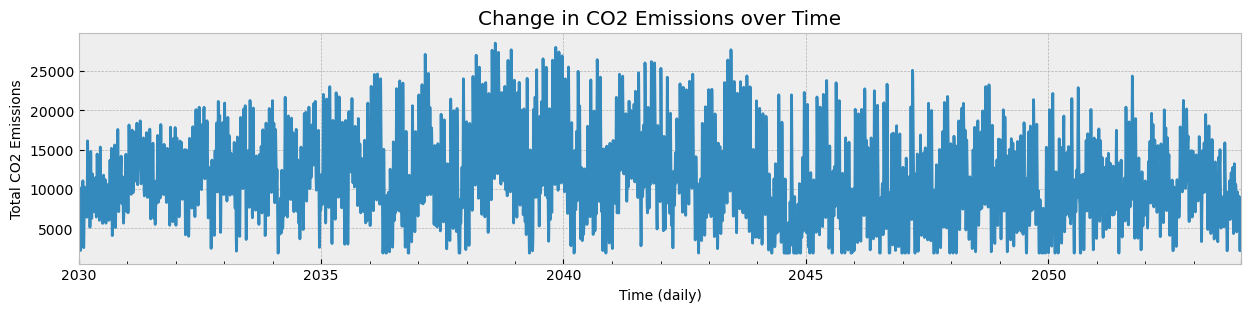

In [69]:
emissions = (n96.generators_t.p / n96.generators.efficiency * n96.generators.carrier.map(n96.carriers.co2_emissions)).sum(axis=1)

emissions.index = pd.date_range(start='2030-01-01', periods=len(emissions), freq='D')

emissions.plot(figsize=(15, 3), title='Change in CO2 Emissions over Time', xlabel='Time (daily)', ylabel='Total CO2 Emissions')


ValueError: setting an array element with a sequence.

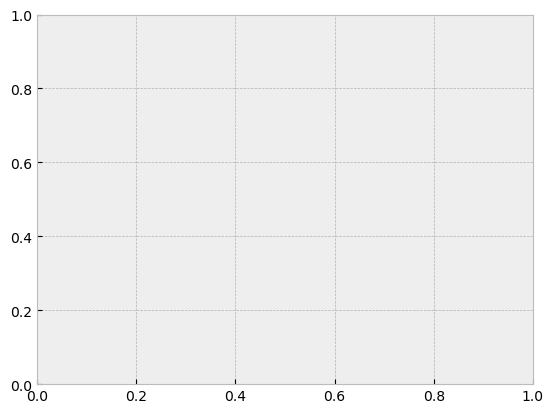

In [26]:
fig, ax = plt.subplots()

ax.plot(n.generators_t.p / n.generators.efficiency * n.generators.carrier.map(n.carriers.co2_emissions)).sum(axis=1)

ax.set_xlabel('Time')
ax.set_ylabel('Total CO2 Emissions')
ax.set_title('Change in CO2 Emissions over Time')

plt.show()

# 5. Plot Network Analysis

In [ ]:
import cartopy.crs as ccrs

In [ ]:
loading =(n.lines_t.p0.abs().mean().sort_index() / (n.lines.s_nom_opt*n.lines.s_max_pu).sort_index()).fillna(0.)

In [ ]:
#### PlateCarree, Mercator, Orthographic

In [ ]:
fig,ax =plt.subplots(
            figsize=(10,10),
            subplot_kw={"projection": ccrs.PlateCarree()}
)

n.plot(ax=ax,
      bus_colors='gray',
      branch_components=["Line"],
      line_widths=n.lines.s_nom_opt/3e3,
      line_colors=loading,
      line_cmap=plt.cm.viridis,
      color_geomap=True,
      bus_sizes=0)

ax.axis('off');

In [ ]:
n.plot(bus_sizes=1, margin=1);

In [ ]:
#### pmax per unit by carriers

In [ ]:
n.generators_t.p_max_pu.groupby(n.generators.carrier, axis=1).mean().plot(ylabel='p.u.')

In [ ]:
# Plant Capacities - delete Load Shedding

In [ ]:
n.generators.groupby("carrier").p_nom.sum().div(1e3).plot.barh()
plt.xlabel('GW')